In [29]:
import pandas as pd
import numpy as np
import pickle
from matplotlib.colors import ListedColormap
import statsmodels.api as sm
import statsmodels.formula.api as smf
from irt import *
data_path = '/llmthonskdir/felipe/download_openllmlb/'

def filter(s):
    try:s = s.split("/")[1]
    except: s = s
    try:s = s.split("__")[1]
    except: s = s
    return s.lower().replace("-hf","").replace("_","").replace("-","")
    
def search(s, s_list):
    scores = [fuzz.token_sort_ratio(filter(s), filter(s_try)) for s_try in s_list]
    return [s_list[np.argmax(scores)], np.max(scores)]

In [30]:
scenarios = ['harness_arc_challenge_25', 'harness_gsm8k_5', 'harness_hellaswag_10', 'harness_truthfulqa_mc_0', 'harness_winogrande_5', 'harness_hendrycksTest_abstract_algebra_5', 'harness_hendrycksTest_anatomy_5', 'harness_hendrycksTest_astronomy_5', 'harness_hendrycksTest_business_ethics_5', 'harness_hendrycksTest_clinical_knowledge_5', 'harness_hendrycksTest_college_biology_5', 'harness_hendrycksTest_college_chemistry_5', 'harness_hendrycksTest_college_computer_science_5', 'harness_hendrycksTest_college_mathematics_5', 'harness_hendrycksTest_college_medicine_5', 'harness_hendrycksTest_college_physics_5', 'harness_hendrycksTest_computer_security_5', 'harness_hendrycksTest_conceptual_physics_5', 'harness_hendrycksTest_econometrics_5', 'harness_hendrycksTest_electrical_engineering_5', 'harness_hendrycksTest_elementary_mathematics_5', 'harness_hendrycksTest_formal_logic_5', 'harness_hendrycksTest_global_facts_5', 'harness_hendrycksTest_high_school_biology_5', 'harness_hendrycksTest_high_school_chemistry_5', 'harness_hendrycksTest_high_school_computer_science_5', 'harness_hendrycksTest_high_school_european_history_5', 'harness_hendrycksTest_high_school_geography_5', 'harness_hendrycksTest_high_school_government_and_politics_5', 'harness_hendrycksTest_high_school_macroeconomics_5', 'harness_hendrycksTest_high_school_mathematics_5', 'harness_hendrycksTest_high_school_microeconomics_5', 'harness_hendrycksTest_high_school_physics_5', 'harness_hendrycksTest_high_school_psychology_5', 'harness_hendrycksTest_high_school_statistics_5', 'harness_hendrycksTest_high_school_us_history_5', 'harness_hendrycksTest_high_school_world_history_5', 'harness_hendrycksTest_human_aging_5', 'harness_hendrycksTest_human_sexuality_5', 'harness_hendrycksTest_international_law_5', 'harness_hendrycksTest_jurisprudence_5', 'harness_hendrycksTest_logical_fallacies_5', 'harness_hendrycksTest_machine_learning_5', 'harness_hendrycksTest_management_5', 'harness_hendrycksTest_marketing_5', 'harness_hendrycksTest_medical_genetics_5', 'harness_hendrycksTest_miscellaneous_5', 'harness_hendrycksTest_moral_disputes_5', 'harness_hendrycksTest_moral_scenarios_5', 'harness_hendrycksTest_nutrition_5', 'harness_hendrycksTest_philosophy_5', 'harness_hendrycksTest_prehistory_5', 'harness_hendrycksTest_professional_accounting_5', 'harness_hendrycksTest_professional_law_5', 'harness_hendrycksTest_professional_medicine_5', 'harness_hendrycksTest_professional_psychology_5', 'harness_hendrycksTest_public_relations_5', 'harness_hendrycksTest_security_studies_5', 'harness_hendrycksTest_sociology_5', 'harness_hendrycksTest_us_foreign_policy_5', 'harness_hendrycksTest_virology_5', 'harness_hendrycksTest_world_religions_5']

In [31]:
scenario = 'harness_arc_challenge_25'

In [32]:
#for scenario in scenarios:

###
with open('lb.pickle', 'rb') as handle:
    lb_data1 = pickle.load(handle)
with open(data_path+'scaling_laws/old_leaderboard_processed_20240630.pickle', 'rb') as handle:
    lb_data2 = pickle.load(handle)
scaling_base = pd.read_csv(data_path+'scaling_laws/base_llm_benchmark_eval.csv')
scaling_inst = pd.read_csv(data_path+'scaling_laws/instruct_llm_benchmark_eval.csv')
scaling_data = pd.concat((scaling_base, scaling_inst))

In [33]:
###
models_irt_train = lb_data1['models']
models_irt_train = [filter(m) for m in models_irt_train]
models = lb_data2[scenario]['models']
models = [filter(m) for m in models]
scaling_models = list(scaling_data.Model)
scaling_models = [filter(m) for m in scaling_models]

In [50]:
ind = [i for i,m in enumerate(models_irt_train) if m not in models]
Y = np.vstack((lb_data2[scenario]['correctness'], lb_data1['data'][scenario]['correctness'].T[ind]))
irt = IRT([1])
irt.fit(Y, verbose=True)
irt.logAlpha = np.log(np.exp(irt.logAlpha)*irt.Theta.std())
irt.Theta = (irt.Theta-irt.Theta.mean())/irt.Theta.std()
theta = irt.Theta[:lb_data2[scenario]['correctness'].shape[0]].squeeze()
theta

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch=0, d=1, train loss=0.40177, val loss=0.37915, val acc=0.84199
epoch=1, d=1, train loss=0.32399, val loss=0.31893, val acc=0.86018
epoch=2, d=1, train loss=0.30092, val loss=0.29910, val acc=0.87155
epoch=3, d=1, train loss=0.29207, val loss=0.29139, val acc=0.87421
epoch=4, d=1, train loss=0.28792, val loss=0.28782, val acc=0.87509
epoch=5, d=1, train loss=0.28580, val loss=0.28622, val acc=0.87600
epoch=6, d=1, train loss=0.28488, val loss=0.28549, val acc=0.87593


array([-0.36727409, -0.13552335,  0.73343149, -0.74040821,  0.0123592 ,
       -1.24134669, -0.62707713,  0.62317841, -1.57013623,  0.42414139,
        0.37043736,  0.18410444, -0.917378  , -1.79528133, -2.26532484,
       -2.49121921, -1.41465289, -1.79998314, -1.43793974, -2.73467791,
       -2.01156983, -2.59193477, -2.58806774, -2.32614441, -1.51364507,
       -0.7798095 , -1.09585201, -1.93522948, -2.13792456, -2.62561799,
       -1.47074245, -1.58255476, -2.15965961, -2.64823936, -1.4712084 ,
       -1.8934559 , -1.30117968, -1.20323847, -0.98612781, -2.53256969,
       -2.371889  , -2.03950723, -1.84606189, -1.52556768, -1.50629462,
       -1.79052923, -1.17468286, -1.45578944, -0.72952733, -1.10880423,
       -1.46265555, -2.40635265, -2.05276886, -2.68367924, -2.37692201,
       -2.03504575, -1.48858135, -1.23302048, -1.77169836, -1.43461004,
       -1.11789029, -1.34727799, -1.08687077, -0.11295478,  0.25737512,
       -0.5946413 , -1.39653767, -1.2102594 ,  0.73350315, -0.37

In [51]:
irt = IRT([1])
irt.fit(lb_data1['data'][scenario]['correctness'].T[ind], verbose=True)
irt.logAlpha = np.log(np.exp(irt.logAlpha)*irt.Theta.std())
irt.Theta = (irt.Theta-irt.Theta.mean())/irt.Theta.std()
Y = lb_data2[scenario]['correctness']
theta = irt.fit_theta(Y, list(range(Y.shape[1]))).squeeze()
theta

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch=0, d=1, train loss=0.36062, val loss=0.36467, val acc=0.85454
epoch=1, d=1, train loss=0.32434, val loss=0.33619, val acc=0.85542
epoch=2, d=1, train loss=0.32161, val loss=0.33347, val acc=0.85596
epoch=3, d=1, train loss=0.32051, val loss=0.33204, val acc=0.85577
epoch=4, d=1, train loss=0.31983, val loss=0.33138, val acc=0.85598


array([-0.96283286,  0.90796153,  1.07139962, -1.12467776,  0.92414319,
       -1.31333269, -0.43124981,  0.98374364, -1.37983942,  1.01033891,
        0.43605469,  0.49634351, -1.25676572, -1.41215234, -1.51656837,
       -2.65422867, -1.25212764, -1.33849354, -1.28531248, -4.93146789,
       -1.4188842 , -3.59278332, -3.34057151, -1.53210937, -1.27457866,
       -1.16726115, -1.20657787, -1.43234305, -1.45965753, -3.56952987,
       -1.30161689, -1.35139819, -1.46729769, -3.07509033, -1.35015405,
       -1.38166515,  0.81572613, -1.25756571, -1.25578261, -3.09240598,
       -1.52106885, -1.45015619, -1.38322182, -1.32016666, -1.36483797,
       -1.45511441, -1.26681057, -1.33289055, -1.22141717, -1.30676874,
       -1.37359461, -2.1292294 , -1.43292198, -3.99066325, -2.19994052,
       -1.4146307 , -1.36292828, -1.29027681, -1.41168992, -1.25717539,
       -1.14247471, -1.22880682, -1.27453211, -0.18346803, -1.06259258,
       -1.14054202, -1.31953947, -1.26196133,  1.13732155,  0.71

In [35]:
scaling_thetas = []
for s in scaling_models:
    if np.sum(np.array(models)==s)>0:
        scaling_thetas.append(theta[np.argmax(np.array(models)==s)])
    else:
        scaling_thetas.append(np.nan)       

In [36]:
###
scaling_data['theta'] = scaling_thetas
scaling_data = scaling_data.loc[~np.isnan(scaling_data.theta)]
scaling_data = scaling_data.loc[~np.array(np.isnan(scaling_data.loc[:,['FLOPs (1E21)']])).squeeze()]
scaling_data['logFLOPs'] = np.log2(scaling_data.loc[:,['FLOPs (1E21)']])
scaling_data = scaling_data.loc[:,['Model Family', 'logFLOPs', 'theta', 'Model Size (B)']]
scaling_data = scaling_data.rename(columns={'Model Family': "family"})
scaling_data = scaling_data.groupby('family').filter(lambda x: len(x) > 1)
scaling_data = scaling_data.sort_values(by=['family', 'logFLOPs'])

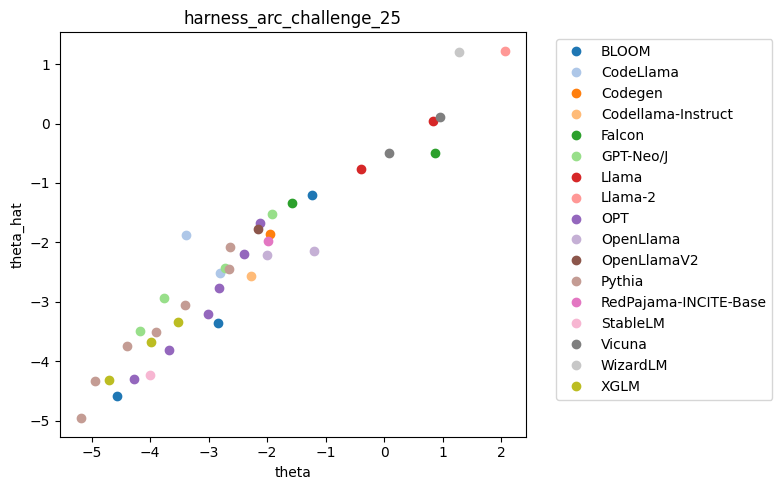

In [37]:
###
families = np.unique(scaling_data.family).tolist()
cmap = ListedColormap(plt.get_cmap('tab20').colors[:len(families)])  # Ensure unique colors

preds = []
trues = []
plt.figure(figsize=(8, 5))

for i, fam in enumerate(families):
    test_fam = [fam]
    train_fam = [f for f in families if f not in test_fam]
    test_ind = np.array([f in test_fam for f in scaling_data.family])
    train_ind = ~np.array(test_ind)
    test_data = scaling_data.loc[test_ind]
    train_data = scaling_data.loc[train_ind]
    
    mod = smf.ols(formula='theta ~ logFLOPs + family - 1', data=train_data)
    mod = mod.fit()
    
    intercept = np.array(test_data.theta)[0] - (mod.params['logFLOPs']*np.array(test_data.logFLOPs))[0]
    preds = np.array(intercept + mod.params['logFLOPs']*np.array(test_data.logFLOPs)).tolist()[1:]
    trues = np.array(test_data.theta).tolist()[1:]
    
    plt.plot(trues, preds, 'o', label=test_fam[0], color=cmap(i))

#min_val = -10
#max_val = 10
#plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('theta')
plt.ylabel('theta_hat')
plt.title(scenario)
plt.tight_layout()
plt.show()